In [ ]:
# from dotenv import load_dotenv


# load_dotenv()

In [2]:
import json

source_json_path = "/Users/oganes/citations/RAGTruth-main/dataset/source_info.jsonl"

source_info_data = []
with open(source_json_path, 'r') as json_file:
    for json_str in json_file:
        cur_data = json.loads(json_str)
        source_info_data.append(cur_data)


response_json_path = "/Users/oganes/citations/RAGTruth-main/dataset/response.jsonl"

response_data = []
with open(response_json_path, 'r') as json_file:
    for json_str in json_file:
        cur_data = json.loads(json_str)
        response_data.append(cur_data)

In [10]:
source_info_data[0].keys()

dict_keys(['source_id', 'task_type', 'source', 'source_info', 'prompt'])

In [3]:
marco_samples = [sample for sample in source_info_data if sample['source'] == 'MARCO']
len(marco_samples)

989

In [4]:
context_sample = marco_samples[1]
context_sample

{'source_id': '14293',
 'task_type': 'QA',
 'source': 'MARCO',
 'source_info': {'question': 'tips how to conserve water',
  'passages': 'passage 1:1 Take shorter showers. 2  Replace you showerhead with an ultra-low-flow version. 3  Some units are available that allow you to cut off the flow without adjusting the water temperature knobs. 4  Use the minimum amount of water needed for a bath by closing the drain first and filling the tub only 1/3 full.\n\npassage 2:Here are 20 water-saving tips to get you going…. 1. Shower Bucket. Instead of letting the water pour down the drain, stick a bucket under the faucet while you wait for your shower water to heat up. You can use the water for flushing the toilet or watering your plants. 2. Turn off the tap while brushing your teeth. Water comes out of the average faucet at 2.5 gallons per minute. Don’t let all that water go down the drain while you brush! Turn off the faucet after you wet your brush, and leave it off until it’s time to rinse. 3. 

In [7]:
len(context_sample["prompt"]), print(context_sample["prompt"])

Briefly answer the following question:
tips how to conserve water
Bear in mind that your response should be strictly based on the following three passages:
passage 1:1 Take shorter showers. 2  Replace you showerhead with an ultra-low-flow version. 3  Some units are available that allow you to cut off the flow without adjusting the water temperature knobs. 4  Use the minimum amount of water needed for a bath by closing the drain first and filling the tub only 1/3 full.

passage 2:Here are 20 water-saving tips to get you going…. 1. Shower Bucket. Instead of letting the water pour down the drain, stick a bucket under the faucet while you wait for your shower water to heat up. You can use the water for flushing the toilet or watering your plants. 2. Turn off the tap while brushing your teeth. Water comes out of the average faucet at 2.5 gallons per minute. Don’t let all that water go down the drain while you brush! Turn off the faucet after you wet your brush, and leave it off until it’s t

(1605, None)

In [13]:
prompts = [sample["prompt"] for sample in marco_samples]

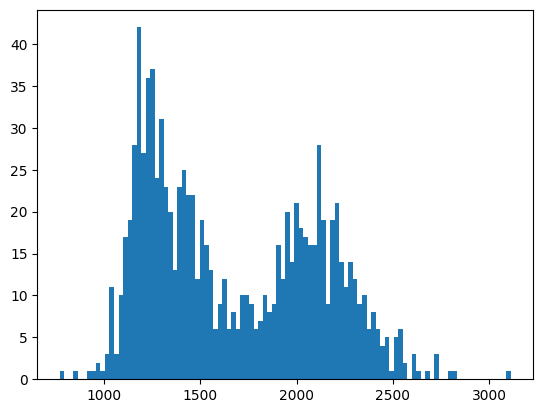

In [16]:
from matplotlib import pyplot as plt

plt.hist([len(prompt) for prompt in prompts], bins=100);

In [27]:
response_data[0].keys()

dict_keys(['id', 'source_id', 'model', 'temperature', 'labels', 'split', 'quality', 'response'])

In [11]:
responses = [sample for sample in response_data if sample['source_id'] == context_sample['source_id'] and sample["model"] == "llama-2-7b-chat"]
print(responses[0]["response"])

Here are some tips for conserving water based on the provided passages:

1. Take shorter showers using an ultra-low-flow showerhead. (Passage 1)
2. Use the minimum amount of water needed for a bath by filling the tub only 1/3 full and closing the drain before running water. (Passage 1)
3. Turn off the tap while brushing your teeth to save 2.5 gallons per minute. (Passage 2)
4. Turn off the tap while washing your hands to save water. (Passage 2)
5. Water lawns in the early morning or evening using a broom instead of a hose to reduce water waste. (Passage 3)
6. Install a shut-off nozzle on your water hose to prevent unnecessary water runoff. (Passage 3)
7. Direct downspouts towards shrubs and trees in your garden to make the most of rainwater. (Passage 3)

Unable to answer based on given passages. The passages do not provide specific information on how to conserve water in the kitchen or indoor spaces.


In [11]:
# from transformers import AutoModelForCausalLM, AutoTokenizer

# model_name = "meta-llama/Llama-2-7b-chat-hf"
# model = AutoModelForCausalLM.from_pretrained(model_name)
# tokenizer = AutoTokenizer.from_pretrained(model_name)
# inputs = tokenizer(prompt, return_tensors="pt")

Loading checkpoint shards: 100%|██████████| 2/2 [00:15<00:00,  7.93s/it]


In [ ]:
# outputs = model.generate(**inputs, do_sample=True, temperature=temp, max_new_tokens=1024)
# res = tokenizer.batch_decode(outputs, skip_special_tokens=True)
# res

['Summarize the following news within 116 words:\nSeventy years ago, Anne Frank died of typhus in a Nazi concentration camp at the age of 15. Just two weeks after her supposed death on March 31, 1945, the Bergen-Belsen concentration camp where she had been imprisoned was liberated -- timing that showed how close the Jewish diarist had been to surviving the Holocaust. But new research released by the Anne Frank House shows that Anne and her older sister, Margot Frank, died at least a month earlier than previously thought. Researchers re-examined archives of the Red Cross, the International Training Service and the Bergen-Belsen Memorial, along with testimonies of survivors. They concluded that Anne and Margot probably did not survive to March 1945 -- contradicting the date of death which had previously been determined by Dutch authorities. In 1944, Anne and seven others hiding in the Amsterdam secret annex were arrested and sent to the  Auschwitz-Birkenau concentration camp. Anne Frank\

In [ ]:
# from transformers import AutoTokenizer
# import transformers
# import torch

# model = "meta-llama/Llama-2-7b-chat-hf"

# tokenizer = AutoTokenizer.from_pretrained(model)
# pipeline = transformers.pipeline(
#     "text-generation",
#     model=model,
# )

# sequences = pipeline(
#     # 'I liked "Breaking Bad" and "Band of Brothers". Do you have any recommendations of other shows I might like?\n',
#     prompt,
#     do_sample=True,
#     temperature=temp,
#     num_return_sequences=1,
#     eos_token_id=tokenizer.eos_token_id,
#     # max_length=200,
#     max_new_tokens=1024
# )
# for seq in sequences:
#     print(f"Result: {seq['generated_text']}")


Loading checkpoint shards:  50%|█████     | 1/2 [00:19<00:19, 19.66s/it]

In [12]:
from ollama import generate

response = generate('llama3.2', prompt)
print(response['response'])

Seventy years ago, Anne Frank died of typhus at 15 in a Nazi concentration camp. New research by the Anne Frank House reveals that she and her sister Margot likely died at least a month before previously thought. The researchers re-examined archives and testimonies from survivors, concluding that they probably did not survive until March 1945. Instead, witnesses reported symptoms in February 1945, making it unlikely they survived that long. The exact dates of death remain unclear, but the new findings contradict previous reports. Anne's diary, one of the world's most popular books, endures as a testament to her hope and resilience.


In [16]:
from ollama import chat
from ollama import ChatResponse

response: ChatResponse = chat(model='llama3.2', messages=[
  {
    'role': 'user',
    'content': prompt,
    'temperature': 0
  },
])
print(response['message']['content'])
# print(response.message.content)

Here is a summary of the news within 116 words:

New research from the Anne Frank House suggests that Anne Frank and her sister Margot died at least a month earlier than previously thought. Researchers re-examined archives and testimonies of survivors to conclude that the sisters likely died before March 1945, contradicting the previous date of death determined by Dutch authorities. The researchers found evidence that the Bergen-Belsen concentration camp was overcrowded and unsanitary, with poor hygiene leading to a deadly typhus outbreak. Anne's friend, Nannette Blitz, recalled seeing her as "no more than a skeleton" in December 1944, with symptoms of typhus appearing before February 7.


In [17]:
from ollama import chat
from ollama import ChatResponse

response: ChatResponse = chat(model='llama3.2', messages=[
  {
    'role': 'user',
    'content': prompt,
    'temperature': 2
  },
])
print(response['message']['content'])
# print(response.message.content)

Seventy years ago, Anne Frank died in a Nazi concentration camp at 15 due to typhus. New research by the Anne Frank House suggests that she and her sister Margot likely died earlier than previously thought, around February 7, rather than March 31, 1945. Researchers re-examined archives and survivor testimonies, concluding that they probably didn't survive until March. The sisters were held in overcrowded Bergen-Belsen camp with poor conditions, exposed to lice-infested bedstraw and clothing, which likely led to the deadly typhus outbreak. Witnesses said both sisters showed symptoms before February 7, making it unlikely they survived until March. The exact dates of death remain unclear, but their story continues to endure as one of the world's most popular books.


In [18]:
from ollama import chat
from ollama import ChatResponse

response: ChatResponse = chat(model='llama3.2', messages=[
  {
    'role': 'user',
    'content': prompt,
    'temperature': 1
  },
])
print(response['message']['content'])
# print(response.message.content)

Here is a summary of the news in 116 words:

New research released by the Anne Frank House suggests that Anne and her sister Margot died at least a month earlier than previously thought, contradicting their previous date of death. Researchers re-examined archives and testimonies from survivors to conclude that they probably did not survive until March 1945. The sisters were held in overcrowded conditions with poor hygiene, increasing the risk of typhus, which is an infectious disease caused by lice. Witnesses reported that Anne showed symptoms before February 7, suggesting that her death likely occurred around this time. The exact dates remain unclear, but it's likely that Margot died before Anne.
